In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential #importing sequential model
from keras.layers import Dense,Activation,Flatten,Dropout,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
#activation layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
#activation layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 50 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
history = model.fit(train_data, train_target, epochs = 20, validation_split = 0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 36s 36ms/step - loss: 0.7396 - accuracy: 0.5444 - val_loss: 0.8916 - val_accuracy: 0.4234
Epoch 2/20
990/990 [==============================] - 34s 34ms/step - loss: 0.5462 - accuracy: 0.7182 - val_loss: 0.5214 - val_accuracy: 0.7056
Epoch 3/20
990/990 [==============================] - 35s 35ms/step - loss: 0.3591 - accuracy: 0.8394 - val_loss: 0.3176 - val_accuracy: 0.8669
Epoch 4/20
990/990 [==============================] - 35s 35ms/step - loss: 0.2336 - accuracy: 0.8990 - val_loss: 0.2424 - val_accuracy: 0.9274
Epoch 5/20
990/990 [==============================] - 35s 35ms/step - loss: 0.1937 - accuracy: 0.9273 - val_loss: 0.1877 - val_accuracy: 0.9355
Epoch 6/20
990/990 [==============================] - 33s 33ms/step - loss: 0.1425 - accuracy: 0.9485 - val_loss: 0.1823 - val_accuracy: 0.9355
Epoch 7/20
990/990 [==============================] - 33s 33ms/step - loss: 0.1010 - accur

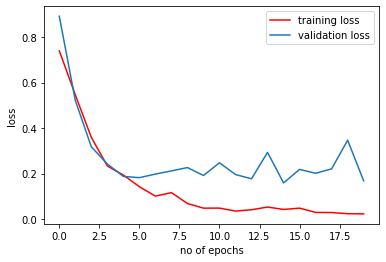

In [5]:
from matplotlib import pyplot as plt 
#graph for traing and testing loss
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

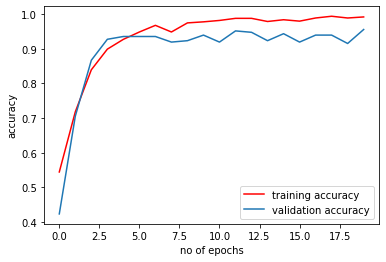

In [6]:
#graph for training and testing accuracy
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 1s 8ms/step
[0.25897718509794143, 0.9275362491607666]


In [8]:
from sklearn.metrics import classification_report
predict = model.predict(test_data)
predict = np.argmax(predict, axis = 1)
print(classification_report(test_target.argmax(axis = 1), predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        83
           1       0.89      0.93      0.91        55

    accuracy                           0.93       138
   macro avg       0.92      0.93      0.92       138
weighted avg       0.93      0.93      0.93       138



In [9]:
model.save('mask_detector.h5')